In [2]:
import pickle
import matplotlib.pyplot as plt

In [25]:
def visualize_stats(stat_obj):
    thresholds = [i[0] for i in stat_obj]
    percentage_of_nodes = [i[2] for i in stat_obj]
    percentage_of_edges = [i[4] for i in stat_obj]
    number_of_connected_components = [i[-1] for i in stat_obj]
    normalized_connected_components = [100*i/max(number_of_connected_components) for i in number_of_connected_components]
    plt.plot(thresholds,percentage_of_nodes)
    plt.plot(thresholds,percentage_of_edges)
    plt.plot(thresholds,normalized_connected_components)

In [ ]:
path="stats_4"
res_alloc_naive=pickle.load(open(f"{path}/resource_allocation_naive_stats.pkl","rb"))
simple_disparity_filter=pickle.load(open(f"{path}/simple_disparity_filter_stats.pkl","rb"))
simple_noise_corrected=pickle.load(open(f"{path}/simple_noise_corrected_stats.pkl","rb"))

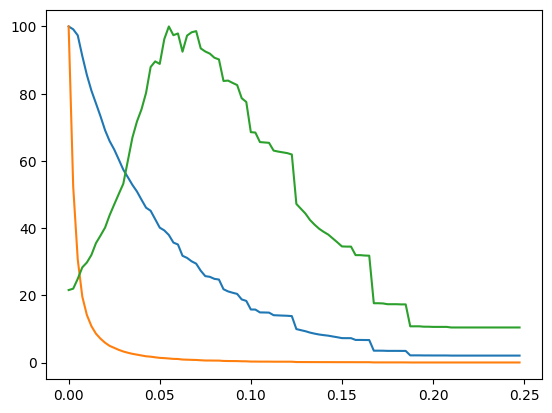

In [27]:
visualize_stats(res_alloc_naive)

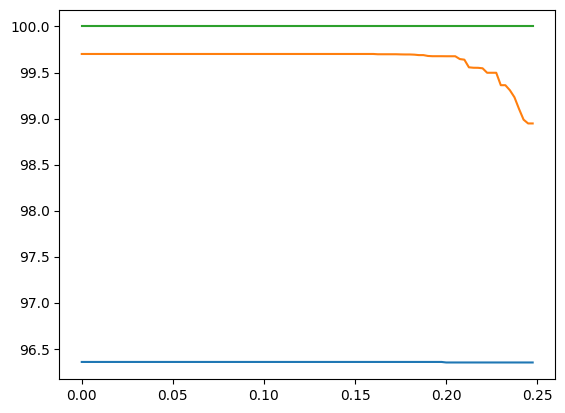

In [28]:
visualize_stats(simple_disparity_filter)

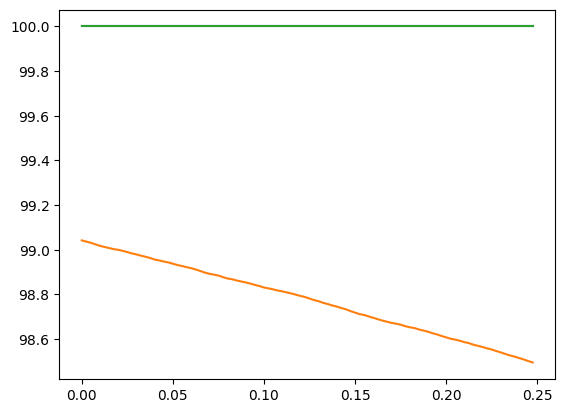

In [29]:
visualize_stats(simple_noise_corrected)